 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [431]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
#import seaborne in order to use heatmaps for correlation 
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [434]:
# Reading whale returns
whale_returns_csv = Path("./Resources/whale_returns.csv")
#Format the csv file in the proper manner to display the data 
whale_data = pd.read_csv(whale_returns_csv, index_col= "Date", parse_dates = True, infer_datetime_format = True)
whale_data.sort_index(ascending = True, inplace = True)
whale_data.head()

/var/folders/vg/nwk2gz4n6q9_f7dhrgdhbpm40000gn/T/ipykernel_42431/1622856946.py:4: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  whale_data = pd.read_csv(whale_returns_csv, index_col= "Date", parse_dates = True, infer_datetime_format = True)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [435]:
# Count nulls
#use the isnull function to recognize all the nulls in the list 
print(whale_data.isnull().sum())

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64


In [436]:
# Drop nulls
#dropna recognizes and drops all null values from the dataset
whale_data.dropna(inplace=True)
#check to make sure all of the nulls have been dropped 
whale_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [438]:
# Reading algorithmic returns
algorithm_csv = Path("./Resources/algo_returns.csv")
# YOUR CODE HERE
#repeat process as above to read, clean, and format data prperly
algorithm_data = pd.read_csv(algo_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
algorithm_data.head()

/var/folders/vg/nwk2gz4n6q9_f7dhrgdhbpm40000gn/T/ipykernel_42431/3077034708.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  algorithm_data = pd.read_csv(algo_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [439]:
# Count nulls
# use the isnull function to recognize all the nulls in the list 
algorithm_data.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [440]:
# Drop nulls
#dropna recognizes and drops all null values from the dataset
algorithm_data = algo_returns.dropna()
#check to make sure all of the nulls have been dropped 
algorithm_data.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [442]:
# Reading S&P 500 Closing Prices
sp500_csv = Path("./Resources/sp500_history.csv")
#repeat process as above to read, clean, and format data prperly
sp500_data = pd.read_csv(sp500_csv, index_col="Date", infer_datetime_format=True, parse_dates=True).sort_index(ascending=True)
sp500_data.head()


/var/folders/vg/nwk2gz4n6q9_f7dhrgdhbpm40000gn/T/ipykernel_42431/1700277059.py:4: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sp500_data = pd.read_csv(sp500_csv, index_col="Date", infer_datetime_format=True, parse_dates=True).sort_index(ascending=True)
/var/folders/vg/nwk2gz4n6q9_f7dhrgdhbpm40000gn/T/ipykernel_42431/1700277059.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp500_data = pd.read_csv(sp500_csv, index_col="Date", infer_datetime_format=True, parse_dates=True).sort_index(ascending=True)


,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [443]:
# Check Data Types
# The dtypes fuction will check the data and return the dataypes
sp500_data.dtypes

Close    object
dtype: object

In [444]:
# Fix Data Types
# Cleaning S&P 500 data by converting the "Close" column to numerical format, removing dollar signs, and sorting the data by index
sp500_data["Close"]= sp500_history["Close"].str.replace('$','').astype("float")
sp500_data.sort_index(inplace = True)
sp500_data

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [445]:
# Calculate Daily Returns
# use the pct_change function in order to find the return for the date
sp500_pctchange = sp500_data.pct_change()

In [446]:
# Drop nulls
# use the dropna function in order to find and drop all null values
sp500_pctchange.dropna(inplace = True)
sp500_pctchange.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [447]:
# Rename `Close` Column to be specific to this portfolio.
# The rename function allows you to rename a column after specifying which one 
sp500_pctchange.rename(columns = {"Close":"sp500"}, inplace = True)

## Combine Whale, Algorithmic, and S&P 500 Returns

In [529]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
# concat function allows you to join multiple data sets to process and plot more information at once, it can also help with comparison
# and correlation
all_data = pd.concat([whale_data, algorithm_data,sp500_pctchange], axis = "columns",join = "inner")

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

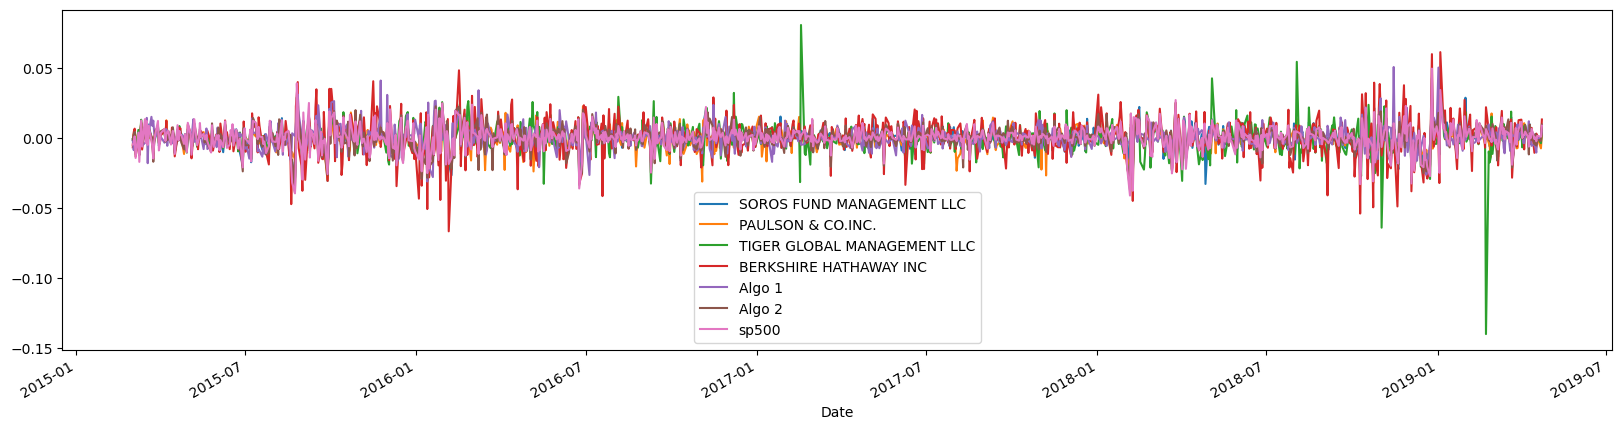

In [453]:
# Plot daily returns of all portfolios
# the plot function allows you to plot data sets on a variety of graphs 
all_data.plot(figsize=(20,5))

#### Calculate and Plot cumulative returns.

<Axes: xlabel='Date'>

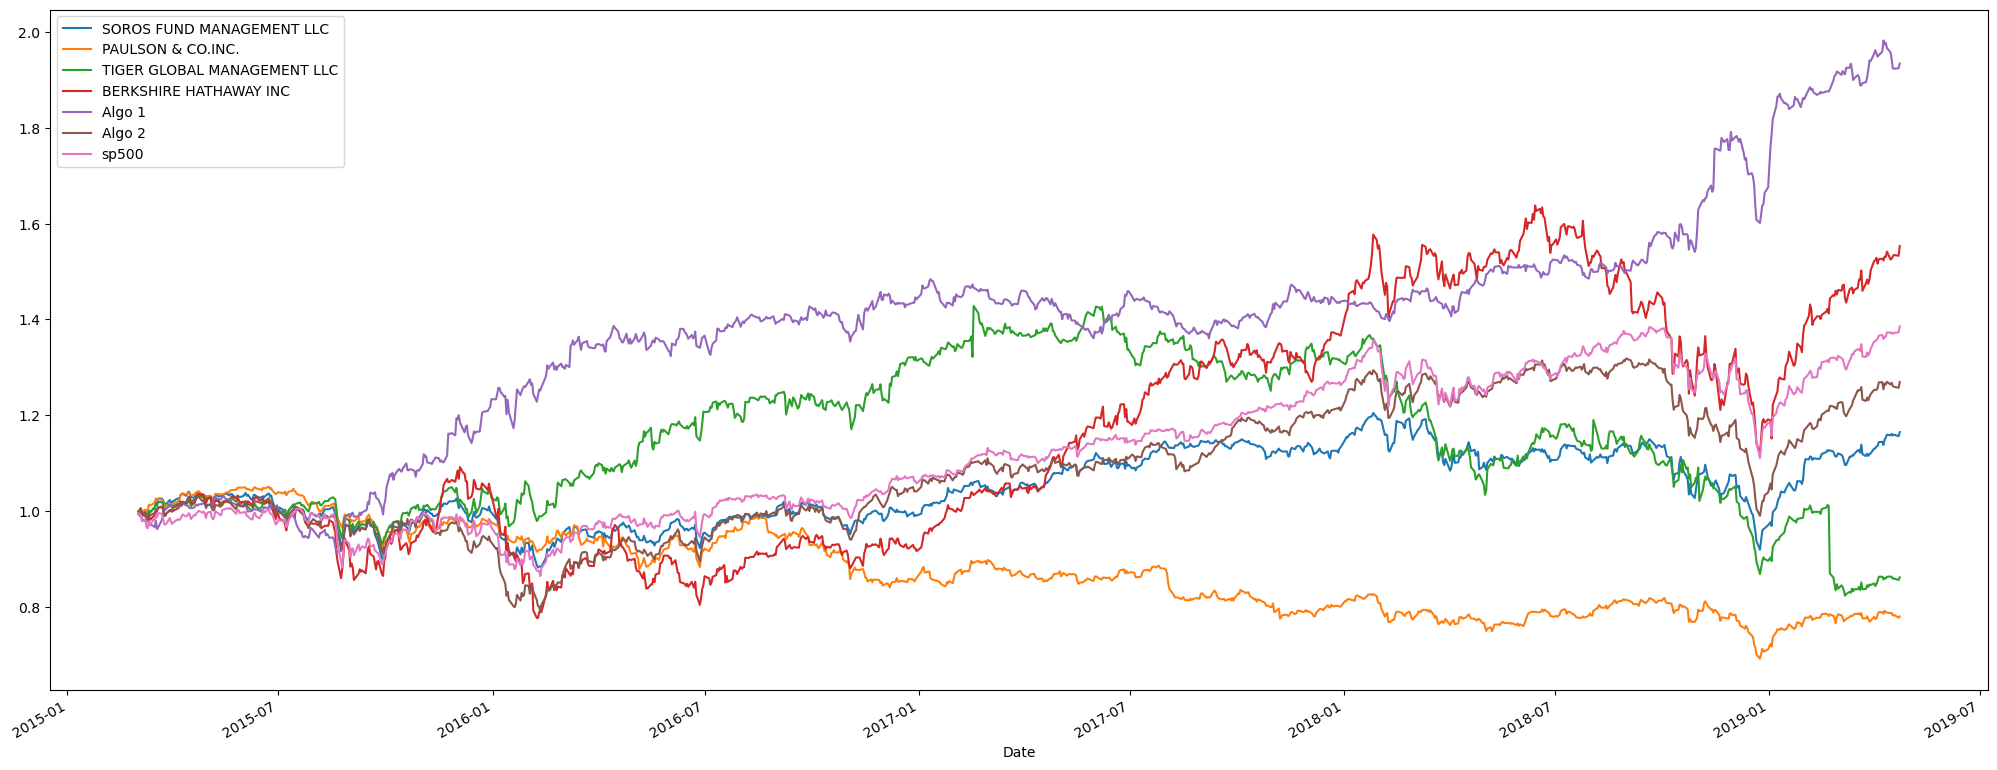

In [455]:
# Calculate cumulative returns of all portfolios
# Plot cumulative returns
# (1 + all_data): Adds 1 to each element in the all_data
# cumprod is a functoin that calculates the cumulative product of the values along a given axis
data_cum = (1+ all_data).cumprod()
data_cum.plot(figsize = (25,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: >

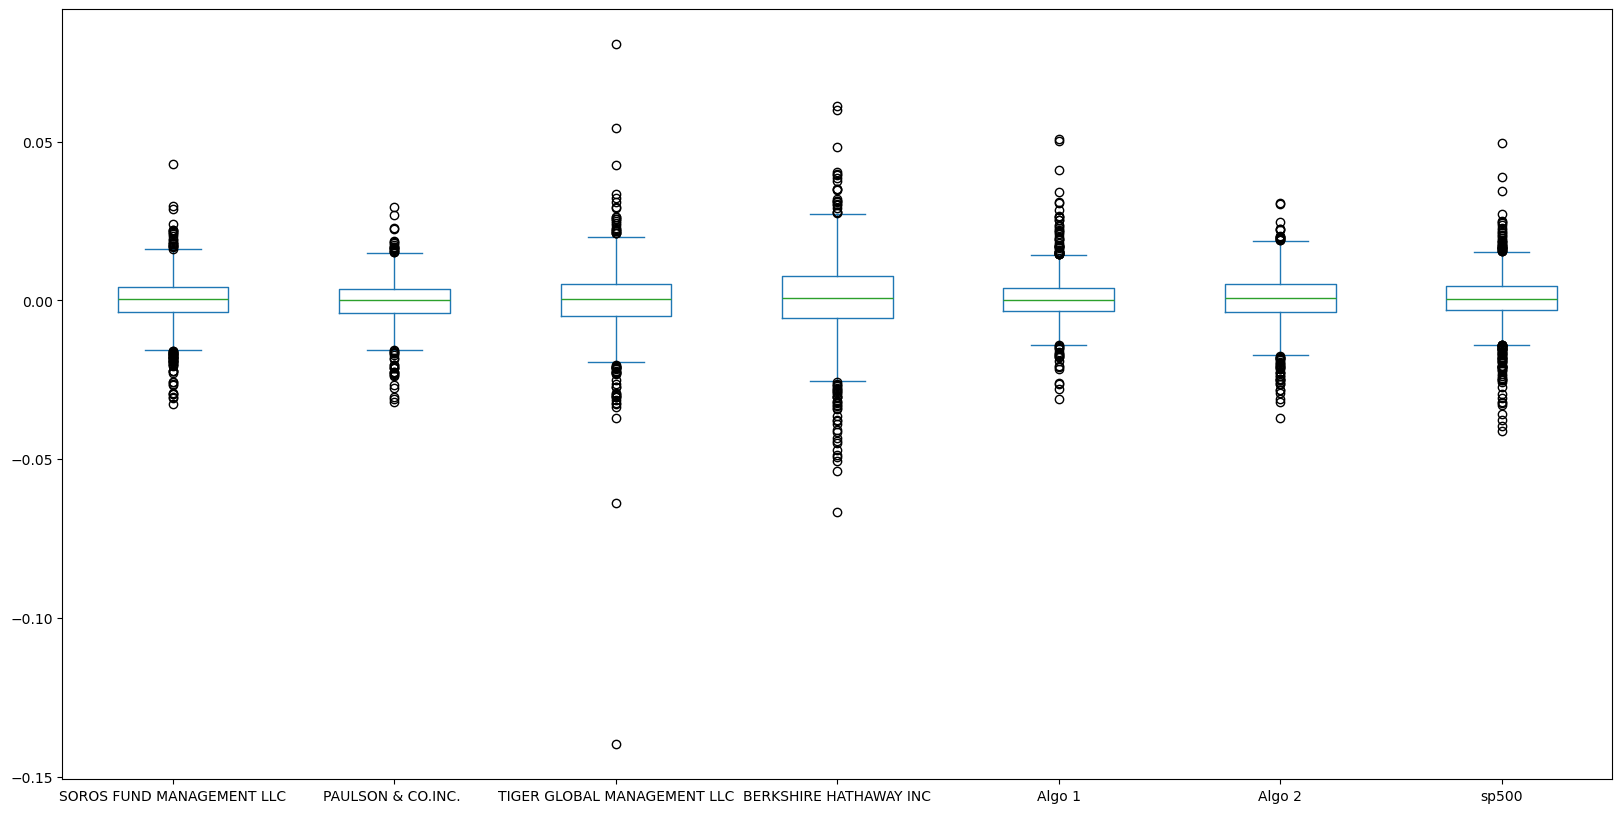

In [459]:
# Box plot to visually show risk
# in this instance of using the plot function, we specify that we want a box plot
all_data.plot(kind = "box", figsize = (20,10))

### Calculate Standard Deviations

In [461]:
# Calculate the daily standard deviations of all portfolios
# std is a pandas dataframe method that computes the standard deviation of each column in the dataframe
all_data_std = all_data.std()
all_data_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
sp500                          0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [463]:
# Calculate  the daily standard deviation of S&P 500
# Determine which portfolios are riskier than the S&P 500
# We assign the value of the std of the S&P 500 to a variable 
sp500_std = all_data["sp500"].std()
# We then compare the data to each portfolio, by default it will return a TRUE or FALSE 
sp500_std < all_data.std()

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
sp500                          False
dtype: bool

### Calculate the Annualized Standard Deviation

In [465]:
# Calculate the annualized standard deviation (252 trading days)
# Multiplies the standard deviation of each column by the square root of 252. 
# This is a common when annalyzing volatility/standard deviation in finance.
annualized_std = all_data_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
sp500                          0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: xlabel='Date'>

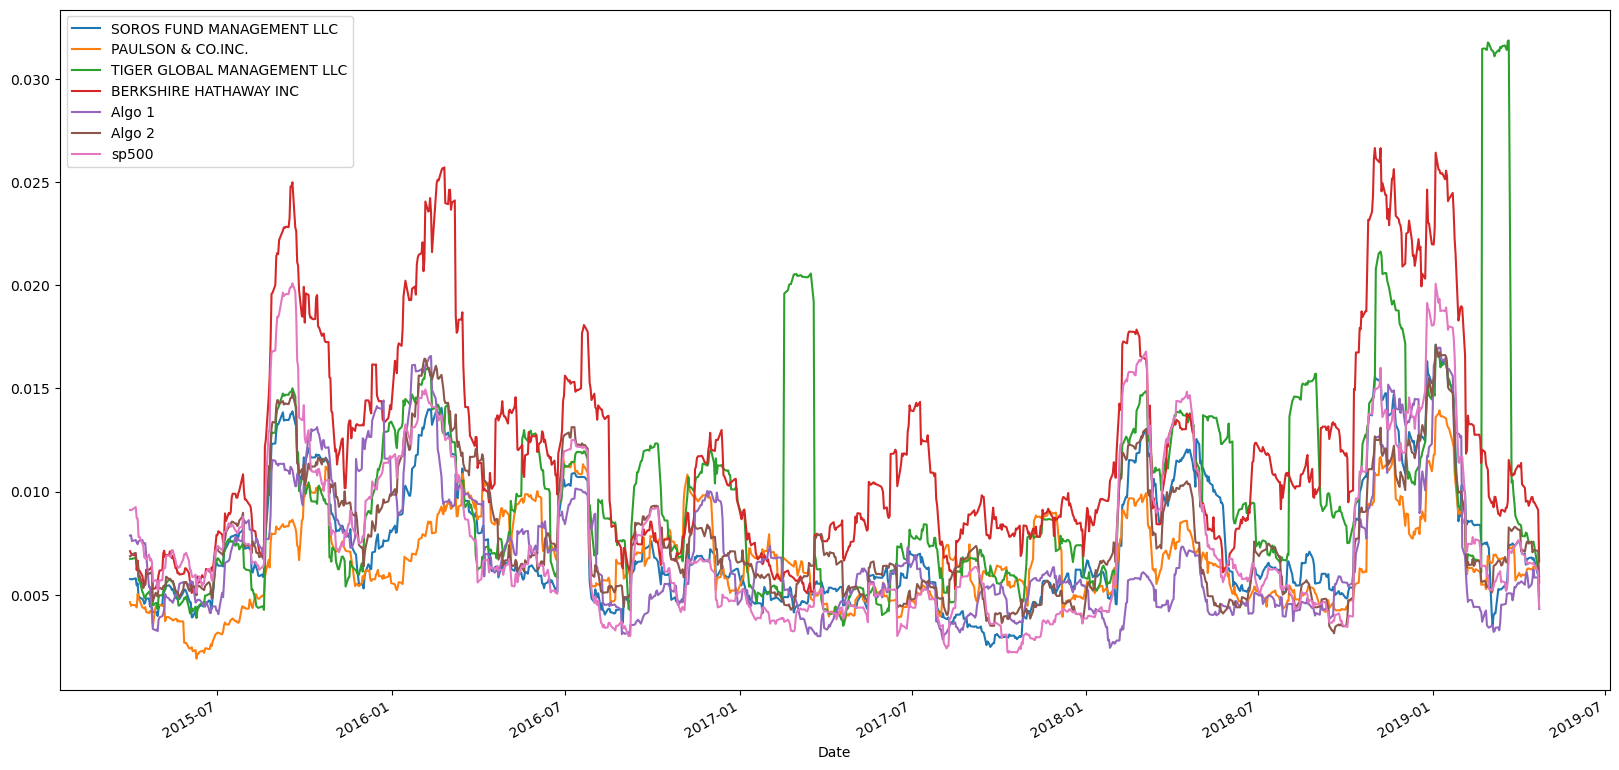

In [533]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation
# 'rolling(window = 21)' is a pandas dataframe method that creates a rolling view 
# of the data within a window size. In this case, the window size is set to 21.
std_rolling = all_data.rolling(window = 21).std()
std_rolling.plot(figsize = (20,10))

### Calculate and plot the correlation

<Axes: >

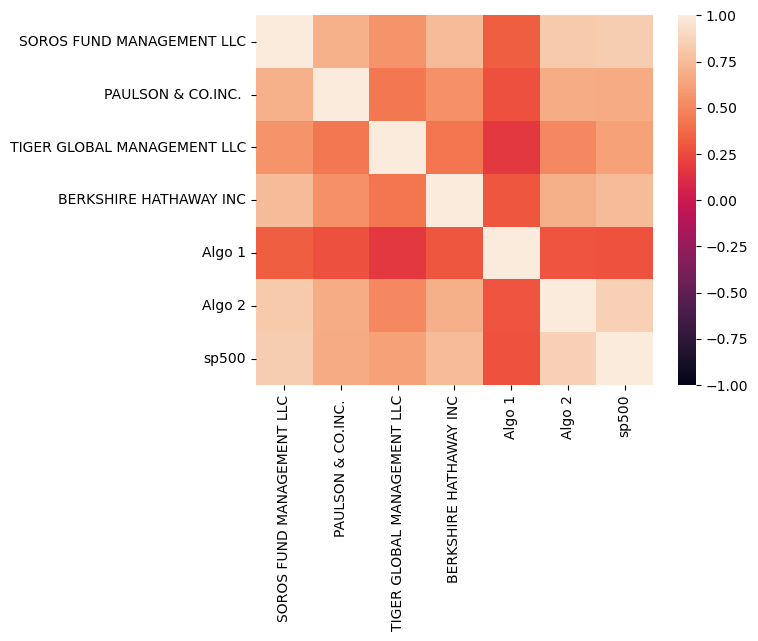

In [471]:
# Calculate the correlation
# corr is a pandas dataframe method that computes the correlation coefficients between columns
correlation = all_data.corr()
# Display de correlation matrix
# Heatmaps are useful for identifying patterns and relationships within large datasets.
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<Axes: xlabel='Date'>

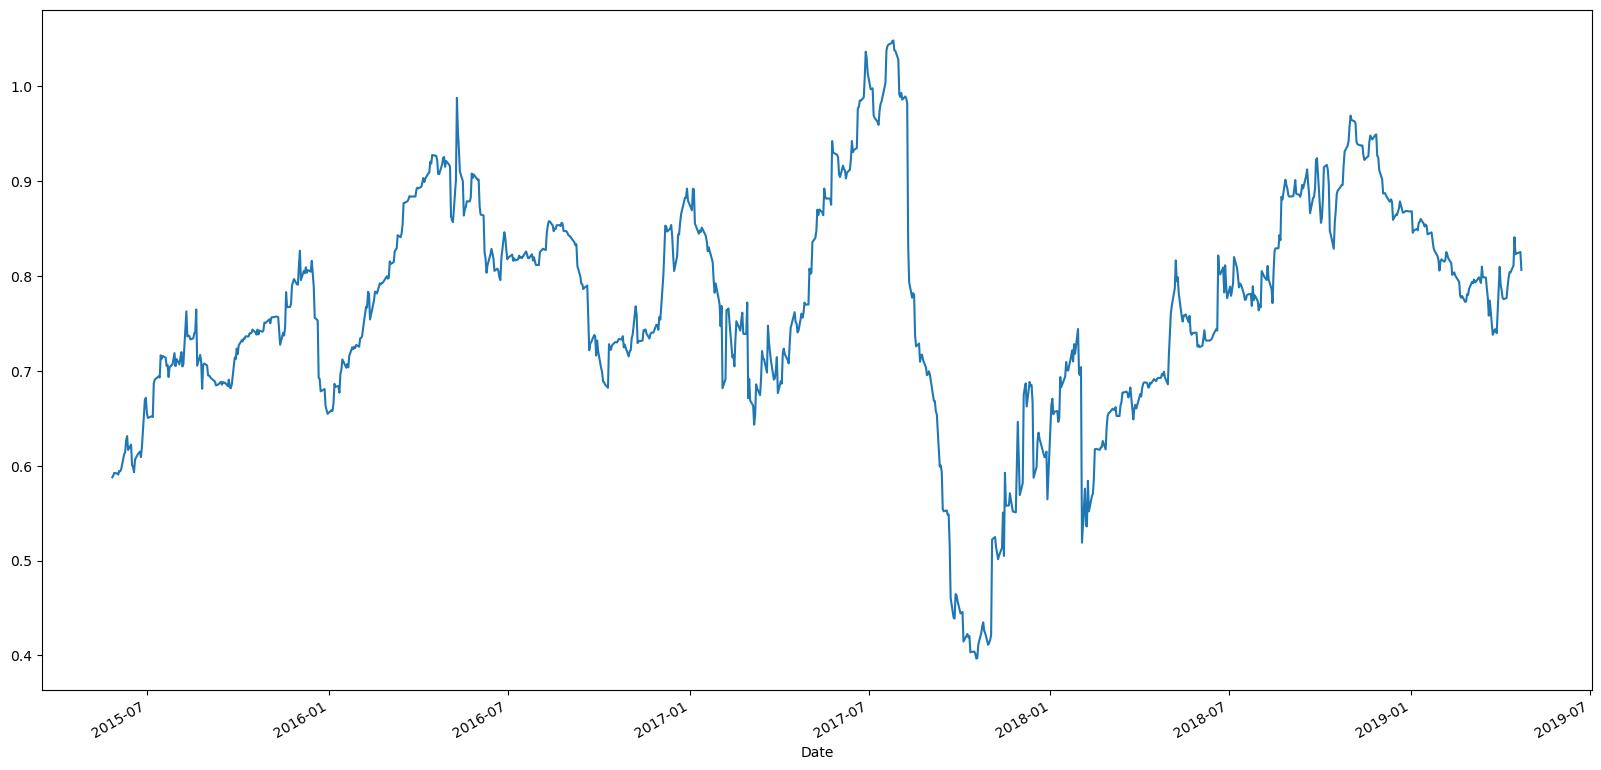

In [521]:
# Calculate covariance of a single portfolio
# Rolling covariance is often used in finance and time-series analysis to capture changing relationships between two variables over time.
# cov(all_data['sp500']) calculates the covariance between the SOROS FUND MANAGEMENT LLC and the S&P 500 within the rolling window.
rolling_covariance = all_data['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(all_data['sp500'])

# Calculate variance of S&P 500
# var calculates the variance within the rolling window for the selected column.
rolling_variance = all_data['sp500'].rolling(window=60).var()

# Computing beta
# Beta is a measure of the systematic risk or sensitivity of an investment to movements in the overall market.
rolling_beta = rolling_covariance / rolling_variance

# Plot beta trend
rolling_beta.plot(figsize=(20, 10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<Axes: xlabel='Date'>

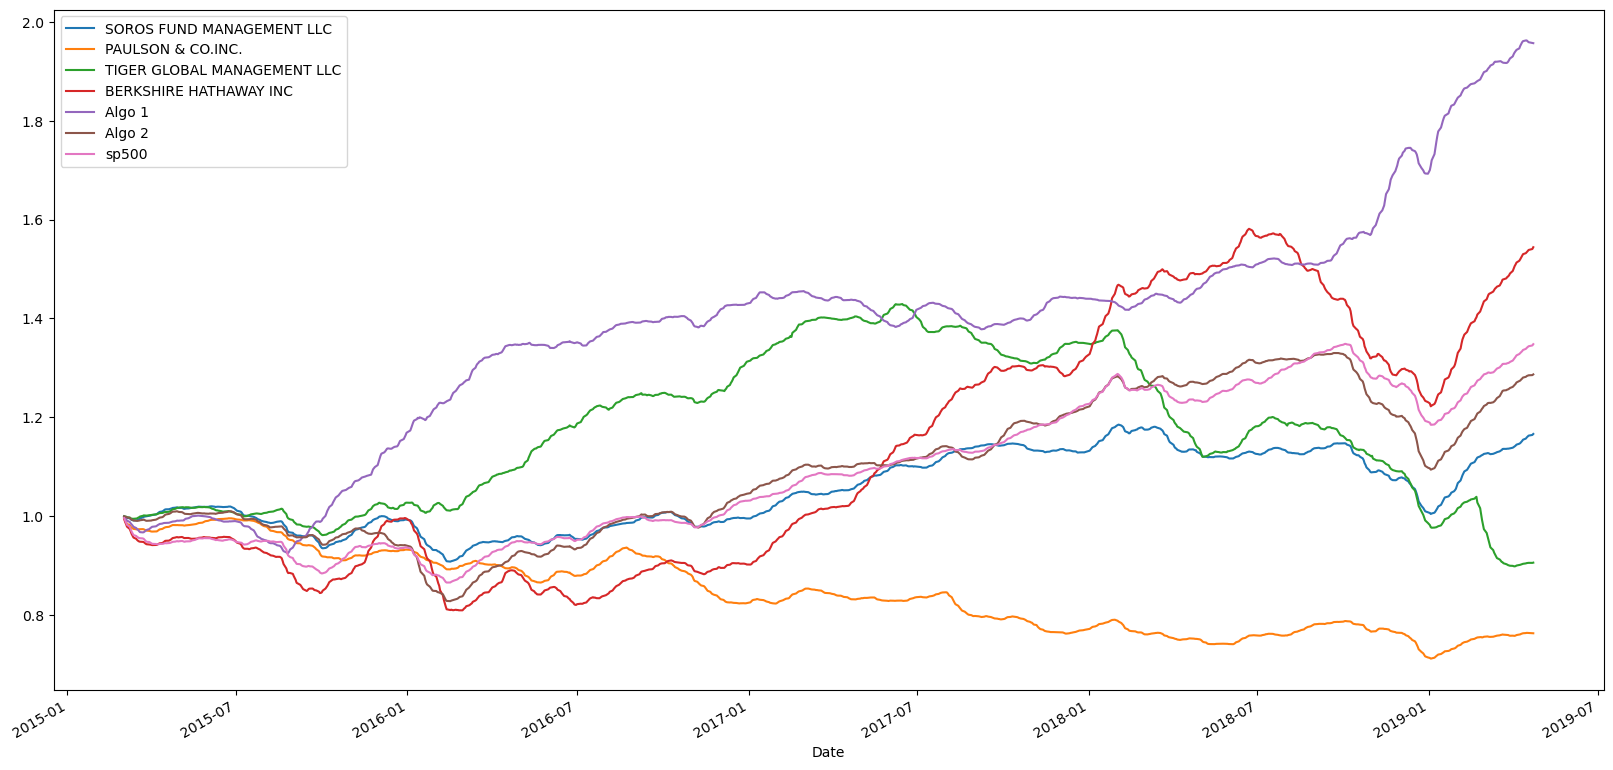

In [523]:
# Use `ewm` to calculate the rolling window
# This calculates the exponential moving average (EMA) of each column
all_data_ewm = all_data.ewm(span = 21,adjust = False).mean()
# cumprod Calculates the cumulative product of the values along the specified axis.
(1+all_data_ewm).cumprod().plot(figsize = (20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [527]:
# Annualized Sharpe Ratios
# mean calculates average of each column
# 252 represents the number of trading days in a year
sharpe_ratios = all_data.mean()*252/annualized_std
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
sp500                          0.648267
dtype: float64

---

<Axes: title={'center': 'Sharpe Ratios'}>

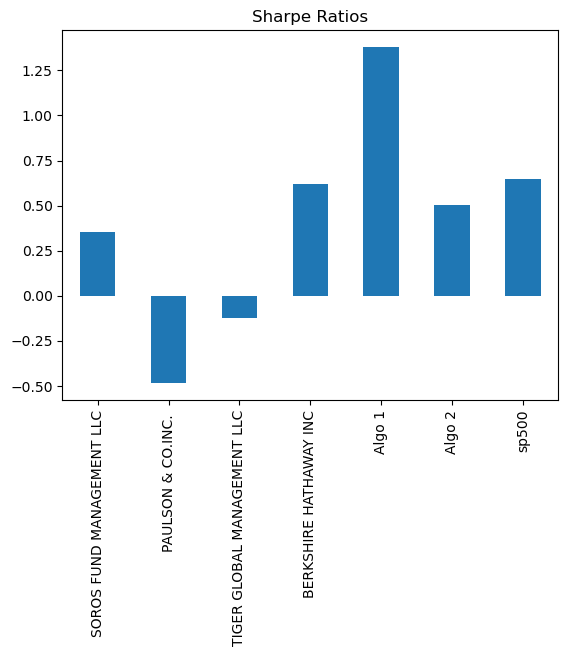

In [217]:
# Visualize the sharpe ratios as a bar plot
# for this scenario we are using the plot function with a bar graph 
sharpe_ratios.plot(kind = "bar", title = "Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!
Algorithm one outperformed both the S&P 500 and the whales portfolio
Algorithm two did not outperform the whale portfolio and the S&P 500

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [553]:
# Reading data from 1st stock
aapl_csv = Path("./Personal-Portfolio/AAPLE_DATA.csv")
# Reset Date index
aapl_data = pd.read_csv(aapl_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
# Reorganize portfolio data by having a column per symbol
aapl_data = aapl_data.rename(columns = {"Close":"AAPL"})

/var/folders/vg/nwk2gz4n6q9_f7dhrgdhbpm40000gn/T/ipykernel_42431/1792102496.py:4: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  aapl_data = pd.read_csv(aapl_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)


In [547]:
# Reading data from 2nd stock
nvda_csv = Path("./Personal-Portfolio/NVDA_DATA.csv")
# Reset Date index
nvda_data = pd.read_csv(nvda_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
# Reorganize portfolio data by having a column per symbol
nvda_data = nvda_data.rename(columns = {"Close":"NVDA"})

/var/folders/vg/nwk2gz4n6q9_f7dhrgdhbpm40000gn/T/ipykernel_42431/3600929997.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  nvda_data = pd.read_csv(nvda_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)


In [549]:
# Reading data from 3rd stock
amzn_csv = Path("./Personal-Portfolio/AMAZON_DATA.csv")
# Reset Date index
amzn_data = pd.read_csv(amzn_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
# Reorganize portfolio data by having a column per symbol
amzn_data = amzn_data.rename(columns = {"Close":"AMZN"})

/var/folders/vg/nwk2gz4n6q9_f7dhrgdhbpm40000gn/T/ipykernel_42431/1893705782.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  amzn_data = pd.read_csv(amzn_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)


In [551]:
# Combine all stocks in a single DataFrame
personal_returns = pd.concat

In [ ]:
# Calculate daily returns

# Drop NAs

# Display sample data

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!